In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

Accuracy: 0.9298245614035088
              precision    recall  f1-score   support

           B       0.94      0.95      0.94       108
           M       0.92      0.89      0.90        63

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171

Accuracy: 93.0% F1: 0.92


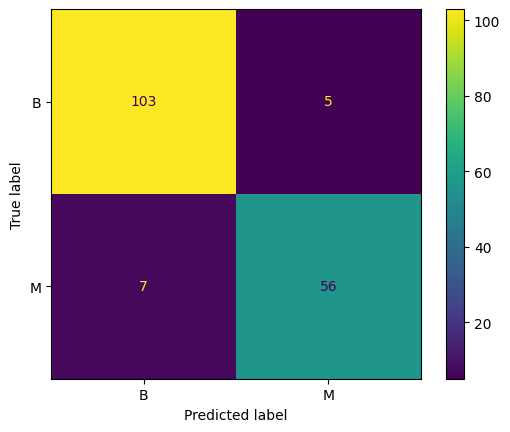

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import skops.io as sio
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer



# Load the breast cancer dataset
df = pd.read_csv(r'C:\Users\sonali\Desktop\Machine Learning Datasets\data -8.csv')

X=df.drop(["diagnosis"],axis=1)
Y=df["diagnosis"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

num_col = [0,1,2,3,4,5,6,7,8,9]

transform = ColumnTransformer(
    [
        
        ("num_scaler", StandardScaler(), num_col)
    ]
)


model = Pipeline(
    steps=[
        ("preprocessing", transform),
        ("model",LogisticRegression()),
    ]
)

# Standardize features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average="macro")

print("Accuracy:", str(round(accuracy, 2) * 100) + "%", "F1:", round(f1, 2))

# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.savefig("./Results/model_results.png", dpi=120)

# Write metrics to file
with open("./Results/metrics.txt", "w", encoding="utf-8") as outfile:
    outfile.write(f"\nAccuracy = {round(accuracy, 2)}, F1 Score = {round(f1, 2)}")

# Saving the model file
sio.dump(model, "./Model/cancer_pipeline.skops")

In [7]:
X_test

,texture_mean,symmetry_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst
204,18.60,0.1925,1.0440,30.29,0.006953,0.02701,0.01782,0.003586,0.1426
70,21.31,0.1582,0.7975,96.05,0.004444,0.02269,0.01386,0.001698,0.1193
131,19.48,0.1931,0.7859,48.31,0.006240,0.02813,0.01397,0.002461,0.1546
431,17.68,0.1811,1.4600,15.43,0.010000,0.04861,0.02187,0.006005,0.1450
540,14.44,0.1818,1.7680,20.86,0.012150,0.05553,0.01840,0.005512,0.1345
...,...,...,...,...,...,...,...,...,...
69,16.49,0.1590,0.8732,18.33,0.007962,0.01585,0.02254,0.001906,0.1296
542,25.42,0.1840,1.3850,27.41,0.004775,0.01947,0.01870,0.002626,0.1060
176,18.06,0.1669,2.2610,27.48,0.012860,0.11970,0.03880,0.017920,0.1301
501,24.49,0.2275,1.5280,39.05,0.009680,0.03476,0.02434,0.006995,0.1794


In [4]:
y_pred

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

In [6]:
y_test

204    B
70     M
131    M
431    B
540    B
      ..
69     B
542    B
176    B
501    M
247    B
Name: diagnosis, Length: 171, dtype: object

In [ ]:
import gradio as gr
from skops.io import load
from sklearn.preprocessing import StandardScaler

# Load the pre-trained model
pipe = load("./Model/cancer_pipeline.skops", trusted=True)

def predict_cancer(texture_mean,symmetry_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst):
    features = [[texture_mean,symmetry_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst]]
    # Standardize features using the same scaler used during training
    # scaler = StandardScaler()
    # features_scaled = scaler.fit_transform(features)
    predicted_cancer = pipe.predict(features)[0]

    label = "Malignant" if predicted_cancer == "M" else "Benign"
    # print(predicted_cancer)
    return label
    # if predicted_cancer == 1 :

inputs = [
    gr.Slider(1, 40, step=0.1, label="texture_mean"),
    gr.Slider(0, 1, step=0.1, label="symmetry_mean"),
    gr.Slider(0, 4, step=1, label="texture_se"),
    gr.Slider(10, 190, step=10, label="area_se"),
    gr.Slider(0, 1, step=0.01, label="smoothness_se"),
    gr.Slider(0, 1, step=0.1, label="concavity_se"),
    gr.Slider(0, 1, step=1, label="symmetry_se"),
    gr.Slider(0, 2, step=1, label="fractal_dimension_se"),
    gr.Slider(0, 2, step=1, label="smoothness_worst")
]

outputs = gr.Label(num_top_classes=2)

examples = [
    [10.38,0.2419,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.16220],
    [24.54,0.1587,1.4280,19.15,0.007189,0.00000,0.02676,0.002783,0.08996],
    [17.77,0.1812,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.12380]
]

title = "Breast Cancer Prediction"
description = "Enter the details to predict breast cancer."
article = "This app predicts whether a tumor is malignant or benign based on its features."

gr.Interface(
    fn=predict_cancer,
    inputs=inputs,
    outputs=outputs,
    examples=examples,
    title=title,
    description=description,
    article=article,
    theme=gr.themes.Soft(),
).launch(debug = True)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
